In [13]:
from TSInterpret.data import load_data
import sklearn
import pickle
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [14]:
dataset='NATOPS'

# Load Data

In [15]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [16]:
print(train_x.shape)
print(test_x.shape)

(180, 51, 24)
(180, 51, 24)


In [17]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../ClassificationModels/models/{dataset}/OneHotEncoder_tf.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Load Model

In [18]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../ClassificationModels/models/{dataset}/cnn/NATOPSbest_model.hdf5')

# Explanation Algo

In [37]:
item=test_x[2].reshape(1,test_x.shape[1],test_x.shape[2])
shape=item.shape
y_target= model.predict(item)

1/1 [==============================] - 0s 18ms/step


In [38]:
y_target

array([[1.0655184e-04, 4.2201293e-04, 6.6304601e-11, 1.6788805e-04,
        8.4515887e-06, 9.9996060e-01]], dtype=float32)

In [39]:
from TSInterpret.InterpretabilityModels.counterfactual.Ates import AtesCF

exp_model= AtesCF(model,(train_x,train_y),mode='time', backend='TF')


In [40]:
#TODO why is zero not working ? 
# TODO Sometimes identical Items are returned.
#TODO Brute all are returned
#TODO Why is opt taking so long?
exp = exp_model.explain(item,1, method= 'brute')

1/1 [==============================] - 0s 14ms/step


In [41]:
array, label=exp

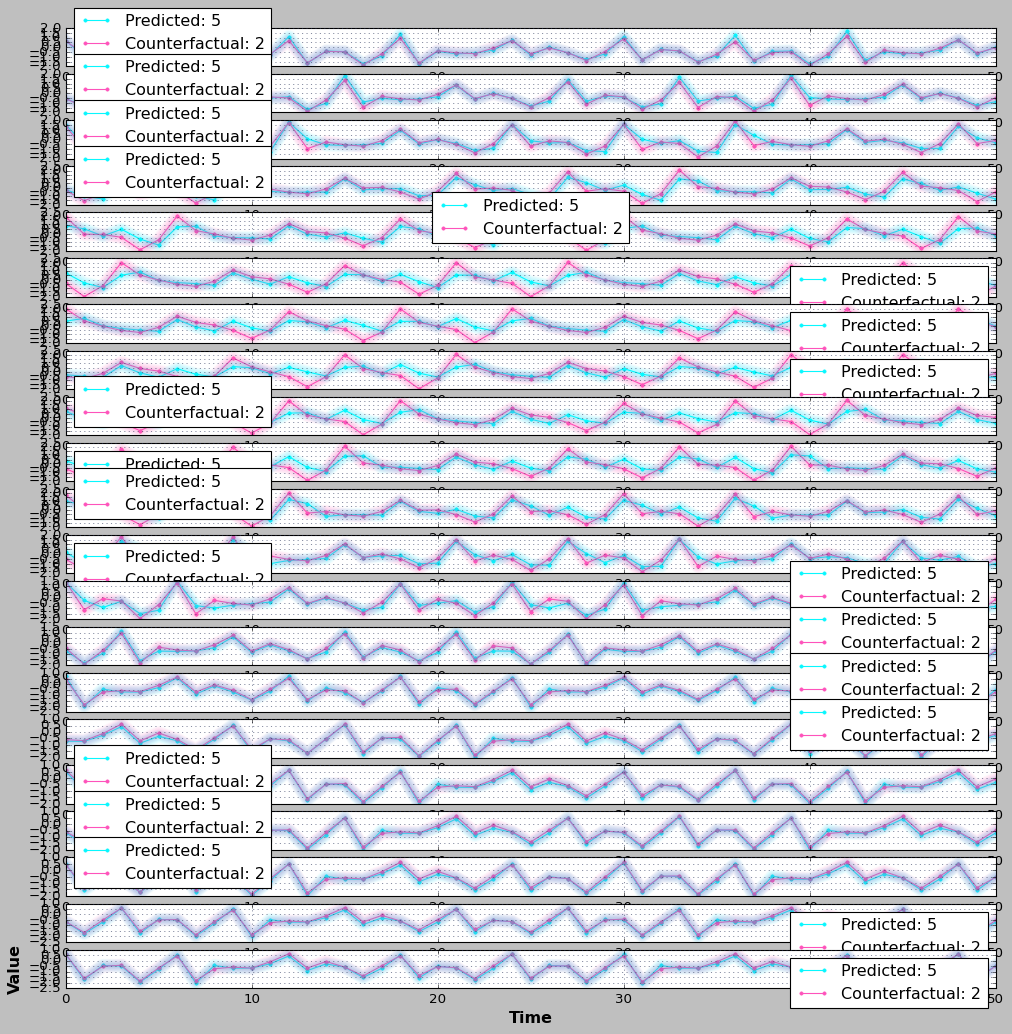

In [42]:
%matplotlib inline
#TODO only one label for whole Graphic next to Graphic 
org_label=np.argmax(y_target)
cf_label=label[0]
exp=array

exp_model.plot(item,org_label,exp,cf_label,figsize=(15,15))